In [1]:
# Import Dependencies# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
sns.set_theme(style="darkgrid")
%matplotlib inline

In [3]:
# load data to a pandas dataframe
df = pd.read_csv("gld_price_data.csv")

In [4]:
# view the contents of datset
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# shape of data
df.shape

(2290, 6)

In [6]:
# basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# check for duplicate rows
df.duplicated().sum()

0

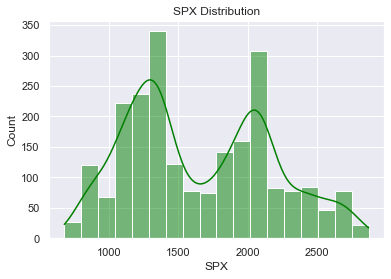

In [9]:
# distribution of SPX
plt.title("SPX Distribution")
sns.histplot(data=df, x='SPX', kde=True, color='green')
plt.show()

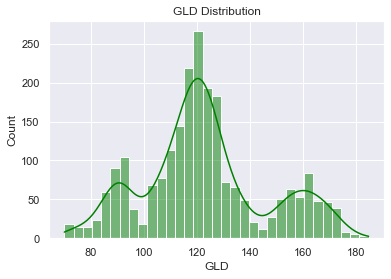

In [10]:
# distribution of GLD
plt.title("GLD Distribution")
sns.histplot(data=df, x='GLD', kde=True, color='green')
plt.show()

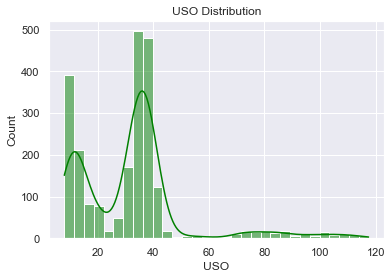

In [11]:
# distribution of USO
plt.title("USO Distribution")
sns.histplot(data=df, x='USO', kde=True, color='green')
plt.show()

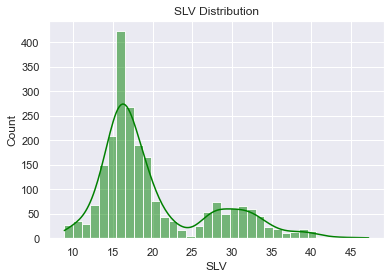

In [12]:
# distribution of SLV
plt.title("SLV Distribution")
sns.histplot(data=df, x='SLV', kde=True, color='green')
plt.show()

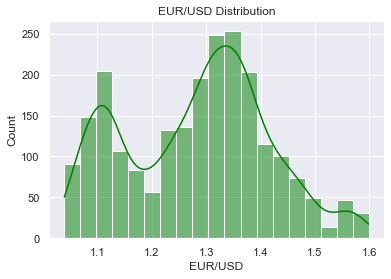

In [13]:
# distribution of EUR/USD
plt.title("EUR/USD Distribution")
sns.histplot(data=df, x='EUR/USD', kde=True, color='green')
plt.show()

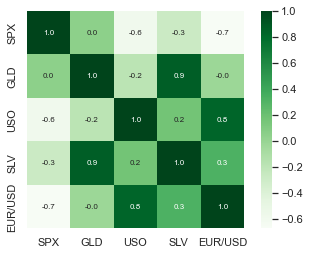

In [14]:
#correlation between different features
correlation = df.corr()
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')
plt.show()

In [15]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [16]:
X = df.drop(columns=['Date', 'GLD'], axis=1)
Y = df['GLD']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [19]:
model = RandomForestRegressor(n_estimators=100)

In [20]:
# training the model
model.fit(X_train, Y_train)

RandomForestRegressor()

In [21]:
# making predictions for testing and training data
train_data_predictions = model.predict(X_train)
test_data_predictions = model.predict(X_test)

In [22]:
# rsquared_error
print(f"The R Squared error for training data is : {r2_score(train_data_predictions, Y_train)}")
print(f"The R Squared error for test data is : {r2_score(test_data_predictions, Y_test)}")

The R Squared error for training data is : 0.9985006019925382
The R Squared error for test data is : 0.9895950364842522
